<center><h1>Safe Driver Prediction</h1></center>
<center><h2>Capstone project by</h2></center>
<center><h2>Murali Mandayam</h2></center>
<center><h3>8th March 2019</h3></center>
<center><h3>www.thinkful.com</h3></center>


Data science has risen to prmoninence in the last decade due to its capabilities in predictive algorithms. While many business verticals value predictive algorithms using Data Science, insurance companies place a lot of importance as it helps them keeps premium low. Data is always been at the core of what insurance companies do analyzing data such as claims, what kind of a vehicle one drives, how many miles do they drive per day among other.
<br><br>
The data science field is gaining strength with improvements in technology, availability of statistical libraries to compute regression or classifications of data collected. Actuaries, the data scientists at insurance companies as they were called a decade ago, used to collate data from different sources and analyze the premium and claim data to identify fraudulent transactions that helped them keep the premiums low. If anything, data science technology of today has given far more tools to perform their analysis.
<br><br>
This Capstone project for Supervised Learning uses data from Kaggle (https://www.kaggle.com/mu202199/safe-driver-prediction). The data has a few ordinal, categorical data that needs to be parsed and categorized properly.
<br><br>
Our goal is to predict a binary outcome of 1, to indicate safe driver, or 0, to indicate that the drivers' data needs a review. We will also look at the continuous variables and fill in the missing data with the mean or median in order to not skew our results.
<br><br>
After cleaning up the data and filling in missing data we will look at the features and their correlation so that we can drop highly correlated data which may impact our results.
<br><br>
Acknowledgements:
<br>
1. https://www.kaggle.com/mu202199/safe-driver-prediction - for dataset
2. https://github.com/ngbolin/PortoSeguroXGB - Kaggle project using Brazilian Insurance company data
3. https://www.datacamp.com/community/tutorials/categorical-data - For ideas on converting categorical data to numeric

In [138]:
# Import the necessary packages of Python that we will use in this notebook
# pandas and numpy for dataframe creation and manipulation
# matplot lib for data visualization
# sklearn for statistical algorithms and splitting the dataset to training and testing datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
import requests
import io

In [139]:
# Read the data from github path with the correct path for your data.

safe_driver = pd.read_excel('IT_3.xlsx')

In [140]:
# Check if there are any NULL data that need to be dropped
safe_driver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30240 entries, 0 to 30239
Data columns (total 17 columns):
ID                              30240 non-null int64
target                          30240 non-null int64
Gender                          30240 non-null object
EngineHP                        30240 non-null int64
credit_history                  30240 non-null int64
Years_Experience                30240 non-null int64
annual_claims                   30240 non-null int64
Marital_Status                  30240 non-null object
Vehicle_Type                    30240 non-null object
Miles_driven_annually           30232 non-null float64
size_of_family                  30240 non-null int64
Age_bucket                      30240 non-null object
EngineHP_bucket                 30240 non-null object
Years_Experience_bucket         30240 non-null object
Miles_driven_annually_bucket    30232 non-null object
credit_history_bucket           30240 non-null object
State                           3

In [141]:
safe_driver.describe()

,ID,target,EngineHP,credit_history,Years_Experience,annual_claims,Miles_driven_annually,size_of_family
count,30240.000000,30240.00000,30240.000000,30240.000000,30240.000000,30240.000000,30232.000000,30240.000000
mean,15120.500000,0.70754,196.604266,685.769775,13.255721,1.138459,17422.938939,4.521296
std,8729.680407,0.45490,132.346961,102.454307,9.890246,1.082913,17483.782840,2.286531
min,1.000000,0.00000,80.000000,300.000000,1.000000,0.000000,5000.000000,1.000000
25%,7560.750000,0.00000,111.000000,668.000000,5.000000,0.000000,9668.500000,3.000000
50%,15120.500000,1.00000,141.000000,705.000000,10.000000,1.000000,12280.000000,5.000000
75%,22680.250000,1.00000,238.000000,753.000000,20.000000,2.000000,14697.250000,7.000000
max,30240.000000,1.00000,1005.000000,850.000000,40.000000,4.000000,99943.000000,8.000000


Our dataset contains several categorical data that ends with **bucket** that need to be either dropped or converted to numerical values using dummies. All features that are of type object are categorical variables that needs to either:<br>
<br>
a. Converted to numeric using dummies<br>
b. Dropped or<br>
c. Assigned a binary value<br>

In [142]:
cat_features = safe_driver.select_dtypes(include=['object']).copy()
print(cat_features.columns)

Index(['Gender', 'Marital_Status', 'Vehicle_Type', 'Age_bucket',
       'EngineHP_bucket', 'Years_Experience_bucket',
       'Miles_driven_annually_bucket', 'credit_history_bucket', 'State'],
      dtype='object')


Among the categorical variables we retain the following:<br>
<br>
1. Gender<br>
2. Marital_Status<br>
3. Vehicle_Type, and<br>
4. Age_bucket<br>
<br>
EngineHP_bucket, Years_Experience_bucket, Miles_driven_annually_bucket, credit_history_bucket have a correspoding continuous variable. Creating their own dummies along with the continuous variable does not make sense. We will keep the Age_bucket as there is no continuous variable to represent age.<br>
<br>
We can split the dataset by State (one sub-dataset for each state) and analyze each state by itself. As each US state has its own regulations it makes sense to analyze each state by itself. We could aggregate our results across states later to get a national statistic.<br>
<br>
Or, for now, we will drop the State column and analyze the data across the nation later.

In [143]:
# Drop these 5 columns: ID, EngineHP_bucket, Years_Experience_bucket, Miles_driven_annually_bucket, credit_history_bucket

safe_driver.drop(['ID', 'EngineHP_bucket', 'Years_Experience_bucket', 
                  'Miles_driven_annually_bucket', 
                  'credit_history_bucket'], axis=1, inplace=True)

In [144]:
safe_driver.isnull().sum()

target                   0
Gender                   0
EngineHP                 0
credit_history           0
Years_Experience         0
annual_claims            0
Marital_Status           0
Vehicle_Type             0
Miles_driven_annually    8
size_of_family           0
Age_bucket               0
State                    0
dtype: int64

The Miles_driven_annually feature has some null values. Let us explore and ingest them with the median data of that feature.

In [145]:
safe_driver[safe_driver.isnull().any(axis=1)]

,target,Gender,EngineHP,credit_history,Years_Experience,annual_claims,Marital_Status,Vehicle_Type,Miles_driven_annually,size_of_family,Age_bucket,State
1235,1,F,124,793,27,0,Married,Truck,NaN,3,>40,NJ
7365,0,F,465,696,5,0,Married,Truck,NaN,8,18-27,SD
11464,1,F,137,787,18,1,Married,Truck,NaN,1,>40,CT
18158,0,F,108,747,8,1,Married,Truck,NaN,1,18-27,OR
19795,1,F,121,774,19,0,Married,Truck,NaN,2,28-34,NY
25731,1,F,355,694,15,1,Married,Truck,NaN,5,28-34,CT
26512,1,F,109,743,40,0,Married,Truck,NaN,1,>40,OR
27045,1,F,83,784,21,0,Married,Truck,NaN,1,>40,CT


It may make sense to ingest the median of  Vehicle_Type=='Truck' as all the NaN values are for Truck only. Let us look at the median of Miles_driven_annually by each vehicle type. 

In [146]:
median_values = safe_driver.groupby('Vehicle_Type').median()
median_values

,target,EngineHP,credit_history,Years_Experience,annual_claims,Miles_driven_annually,size_of_family
Vehicle_Type,,,,,,,
Car,1,148,695,7,1,13147.5,4
Truck,1,150,694,8,1,12370.5,5
Utility,1,132,741,14,1,11117.0,5
Van,1,128,721,15,1,11272.0,5


In [147]:
# Replace NaN values in Miles_driven_annually with the median value for Truck
# There may be better ways to impute missing data. But we have just 8 NaN cells out of some 30,000+ rows
# So, imputing with median for all the 8 cells is not going to skew our results.

safe_driver.fillna(median_values.loc[ 'Truck', 'Miles_driven_annually'], inplace=True)

In [148]:
# Check for null values again to make sure we did not miss any accidentally

safe_driver[safe_driver.isnull().any(axis=1)]

,target,Gender,EngineHP,credit_history,Years_Experience,annual_claims,Marital_Status,Vehicle_Type,Miles_driven_annually,size_of_family,Age_bucket,State


In [149]:
# Check the data types of all remaining features

safe_driver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30240 entries, 0 to 30239
Data columns (total 12 columns):
target                   30240 non-null int64
Gender                   30240 non-null object
EngineHP                 30240 non-null int64
credit_history           30240 non-null int64
Years_Experience         30240 non-null int64
annual_claims            30240 non-null int64
Marital_Status           30240 non-null object
Vehicle_Type             30240 non-null object
Miles_driven_annually    30240 non-null float64
size_of_family           30240 non-null int64
Age_bucket               30240 non-null object
State                    30240 non-null object
dtypes: float64(1), int64(6), object(5)
memory usage: 2.8+ MB


Looking at the feature values above, the range of values of each vary a lot. For example 'Miles_driven_annually' is in the 10s of thousands, whereas 'credit_history' is in the 100s and 'annual-claims' is in single digit. Due to the varying magnitudes of the feature values we will scale the features with Z-scores using sklearn.preprocessing.scale.<br>
<br>

In [150]:
# To standardize the numeric features we need to isolate them first into a separate dataframe

safe_driver_num_features = safe_driver.drop(safe_driver.select_dtypes(['object']), axis=1)
safe_driver_cat_features = safe_driver.select_dtypes(['object'])

In [151]:
safe_driver_num_features[safe_driver_num_features.isnull().any(axis=1)]

,target,EngineHP,credit_history,Years_Experience,annual_claims,Miles_driven_annually,size_of_family


In [152]:
from sklearn import preprocessing

# Restore the column names from the original dataset

safe_driver_scaled = pd.DataFrame(preprocessing.scale(safe_driver_num_features), 
                                  columns=safe_driver_num_features.columns)

# We now have the scaled feature set. Now we need to concatenate the categorical features back with our scaled
# dataset before running OneHotEncoder or dummies.

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """


In [153]:
# We will concatenate the scaled dataframe with the categorical feature set

safe_driver = pd.concat([safe_driver_scaled, safe_driver_cat_features], axis=1)

In [154]:
safe_driver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30240 entries, 0 to 30239
Data columns (total 12 columns):
target                   30240 non-null float64
EngineHP                 30240 non-null float64
credit_history           30240 non-null float64
Years_Experience         30240 non-null float64
annual_claims            30240 non-null float64
Miles_driven_annually    30240 non-null float64
size_of_family           30240 non-null float64
Gender                   30240 non-null object
Marital_Status           30240 non-null object
Vehicle_Type             30240 non-null object
Age_bucket               30240 non-null object
State                    30240 non-null object
dtypes: float64(7), object(5)
memory usage: 2.8+ MB


Let us use data visualization techniques to find the distribution of the features and also the correlation between different features. We could, may be, drop some more features making our dataset cleaner.

/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


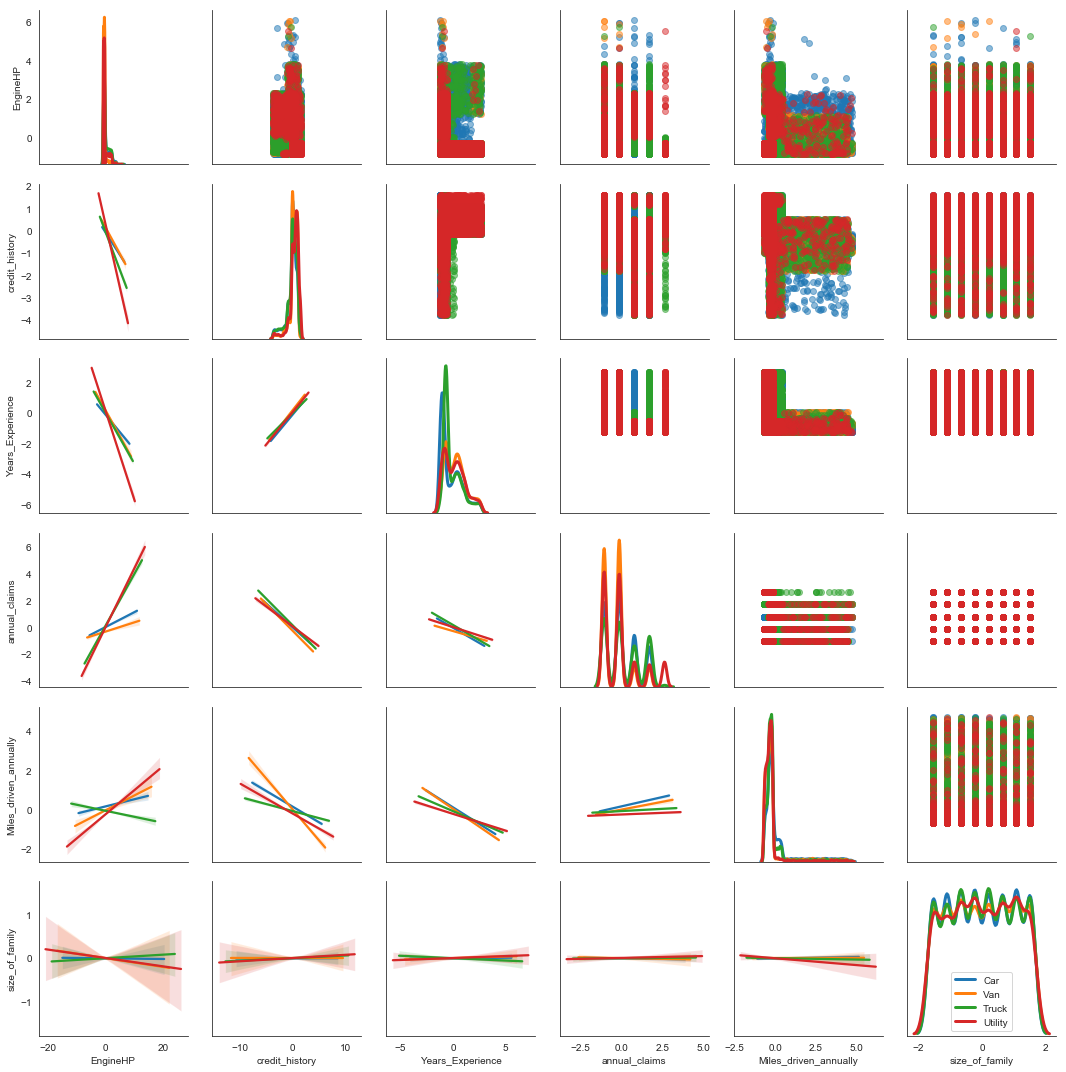

In [155]:
# Create a scatterplot matrix that shows all the bivariate relationships in one plot made up of subplots.
# Let us drop the 'target' variable

safe_driver_copy = safe_driver.drop(['target'], axis=1)

# Plot with the remaining feature set

g = sns.PairGrid(safe_driver_copy.dropna(), diag_sharey=False, hue='Vehicle_Type')
# As in the Unit 2 lesson example, create a Scatterplot in the top-right diagonal
g.map_upper(plt.scatter, alpha=.5)
# Linear relationship of two variables in the bottom-left diagonal
g.map_lower(sns.regplot, scatter_kws=dict(alpha=0))
# And...univariate distributions of the variables across the diagonal
g.map_diag(sns.kdeplot, lw=3)
plt.legend()
plt.show()

# The legend appears at the bottom-right plot


Our next step is to output a correlation heatmap that can tell us correlation coefficient of the features. If two variables are highly corrrelated our results could be incorrect or skewed.<br>
<br>
First we have to isolate the continuous variables in a dataframe before invoking the heatmap.<br>
<br>
Let us create the heatmap.

In [156]:
safe_driver_num_features = safe_driver.drop(['Gender', 'Marital_Status', 'Age_bucket', 'Vehicle_Type'], axis=1)

[]

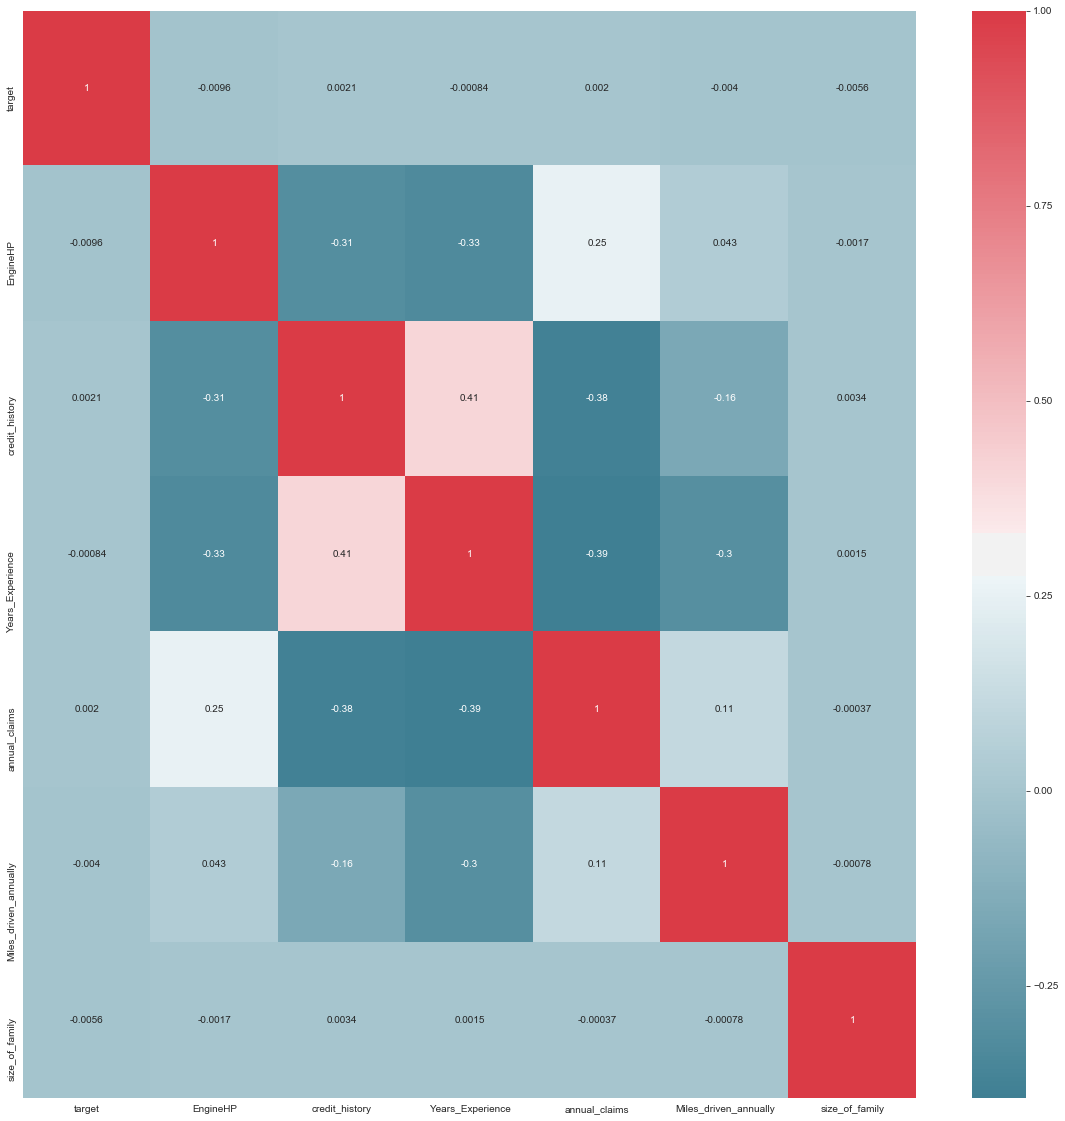

In [157]:
sns.set_style('white')
color_map = sns.diverging_palette(220, 10, as_cmap=True)

plt.figure(figsize=(20, 20))
sns.heatmap(safe_driver_num_features.corr(), annot = True, cmap = color_map)
plt.plot()

Thankfully the variables are not highly correlated. We can keep the remaining features as it is.

Let us find out how significant are our features are in predicting our label. We will use the feature_importances_ method from the RandomForestClassifier. After that we plot the relative importance of the features using a barplot.<br>
<br>
Let us go ahead and select our categorical features, using a RandomForestClassifier.

Separate our feature set from the label (**'target'**) and convert all the categorial variables to numeric. Then split the feature set into training and test data sets.

In [158]:
safe_driver.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30240 entries, 0 to 30239
Data columns (total 12 columns):
target                   30240 non-null float64
EngineHP                 30240 non-null float64
credit_history           30240 non-null float64
Years_Experience         30240 non-null float64
annual_claims            30240 non-null float64
Miles_driven_annually    30240 non-null float64
size_of_family           30240 non-null float64
Gender                   30240 non-null object
Marital_Status           30240 non-null object
Vehicle_Type             30240 non-null object
Age_bucket               30240 non-null object
State                    30240 non-null object
dtypes: float64(7), object(5)
memory usage: 2.8+ MB


In [162]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

# Convert the categories using OneHotEncoder

enc.fit(X)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30240 entries, 0 to 30239
Data columns (total 69 columns):
EngineHP                  30240 non-null float64
credit_history            30240 non-null float64
Years_Experience          30240 non-null float64
annual_claims             30240 non-null float64
Miles_driven_annually     30240 non-null float64
size_of_family            30240 non-null float64
Gender_F                  30240 non-null uint8
Gender_M                  30240 non-null uint8
Marital_Status_Married    30240 non-null uint8
Marital_Status_Single     30240 non-null uint8
Vehicle_Type_Car          30240 non-null uint8
Vehicle_Type_Truck        30240 non-null uint8
Vehicle_Type_Utility      30240 non-null uint8
Vehicle_Type_Van          30240 non-null uint8
Age_bucket_18-27          30240 non-null uint8
Age_bucket_28-34          30240 non-null uint8
Age_bucket_35-40          30240 non-null uint8
Age_bucket_<18            30240 non-null uint8
Age_bucket_>40            30240 n

In [163]:
# Drop the 'target' column from training dataframe as that is our label
X = safe_driver.drop('target', 1)

# The 'target' column is our label or outcome that we want to predict
y = safe_driver['target']

from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

# Convert the categories using OneHotEncoder

enc.fit(X)
X.info()
# Use pd.dummies to resolve the categorical data (e.g. State) into numerical values
#X = pd.get_dummies(X)

# Drop and NaN values
X = X.dropna(axis=1)

# Break the dataset into test and train with 2/3 (train) and 1/3 (test) split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30240 entries, 0 to 30239
Data columns (total 11 columns):
EngineHP                 30240 non-null float64
credit_history           30240 non-null float64
Years_Experience         30240 non-null float64
annual_claims            30240 non-null float64
Miles_driven_annually    30240 non-null float64
size_of_family           30240 non-null float64
Gender                   30240 non-null object
Marital_Status           30240 non-null object
Vehicle_Type             30240 non-null object
Age_bucket               30240 non-null object
State                    30240 non-null object
dtypes: float64(6), object(5)
memory usage: 2.5+ MB


In [136]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30240 entries, 0 to 30239
Data columns (total 69 columns):
EngineHP                  30240 non-null float64
credit_history            30240 non-null float64
Years_Experience          30240 non-null float64
annual_claims             30240 non-null float64
Miles_driven_annually     30240 non-null float64
size_of_family            30240 non-null float64
Gender_F                  30240 non-null uint8
Gender_M                  30240 non-null uint8
Marital_Status_Married    30240 non-null uint8
Marital_Status_Single     30240 non-null uint8
Vehicle_Type_Car          30240 non-null uint8
Vehicle_Type_Truck        30240 non-null uint8
Vehicle_Type_Utility      30240 non-null uint8
Vehicle_Type_Van          30240 non-null uint8
Age_bucket_18-27          30240 non-null uint8
Age_bucket_28-34          30240 non-null uint8
Age_bucket_35-40          30240 non-null uint8
Age_bucket_<18            30240 non-null uint8
Age_bucket_>40            30240 n

In [164]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=12)
regr.fit(X, y)

# The features identified by RandomForest will be our columns for the training and testing dataset

feature_importances = pd.DataFrame(regr.feature_importances_, index = X.columns, 
                                   columns=['importance']).sort_values('importance', ascending=False)

ValueError: could not convert string to float: 'F'

In [108]:
print(feature_importances)

                        importance
credit_history            0.304925
EngineHP                  0.194115
Miles_driven_annually     0.160470
State_NV                  0.086253
State_IA                  0.074030
Years_Experience          0.073215
Gender_F                  0.029232
State_NH                  0.026972
State_OH                  0.026033
State_WY                  0.024756
Vehicle_Type_Car          0.000000
State_OK                  0.000000
State_MO                  0.000000
State_MS                  0.000000
State_MT                  0.000000
State_NC                  0.000000
State_ND                  0.000000
State_NE                  0.000000
Gender_M                  0.000000
State_NJ                  0.000000
State_NM                  0.000000
size_of_family            0.000000
State_NY                  0.000000
annual_claims             0.000000
State_OR                  0.000000
State_MI                  0.000000
State_PA                  0.000000
State_RI            

In [109]:
# Run LogisticRgression model on the training data set
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

predict_lbl_2 = tree.predict(X_test)
tree.score(X_test, y_test) 

ValueError: Unknown label type: 'continuous'

In [89]:
pd.Series(predict_lbl_2).value_counts()

1    6912
0    3068
dtype: int64